# **Aprendizaje no supervisado**
# UL04. Clustering Jerárquico

## <font color='blue'>**Clustering Jerárquico (Hierarchical clustering)**</font>

El clustering jerárquico es una alternativa a los métodos de partitioning clustering que no requiere que se pre-especifique el número de clusters. Los métodos que engloba el hierarchical clustering se subdividen en dos tipos dependiendo de la estrategia seguida para crear los grupos:

* Aglomerativo (agglomerative clustering o bottom-up): el agrupamiento se inicia con todas las observaciones separadas, cada una formando un cluster individual. Los clusters se van combinado a medida que la estructura crece hasta converger en uno solo.

* Divisivo (divisive clustering o top-down): es la estrategia opuesta al aglomerativo. Se inicia con todas las observaciones contenidas en un mismo cluster y se suceden divisiones hasta que cada observación forma un cluster* individual.

En ambos casos, los resultados pueden representarse de forma muy intuitiva en una estructura de árbol llamada dendrograma.



## Aglomerativo

El algoritmo seguido para por el clustering aglomerativo es:

1. Considerar cada una de las $n$ observaciones como un cluster individual, formando así la base del dendrograma (hojas).

2. Proceso iterativo hasta que todas las observaciones pertenecen a un único cluster:

 2.1 Calcular la distancia entre cada posible par de los $n$ clusters. El investigador debe determinar el tipo de medida empleada para cuantificar la similitud entre observaciones o grupos (distancia y linkage).

 2.2 Los dos clusters más similares se fusionan, de forma que quedan $n-1$ clusters.

3. Cortar la estructura de árbol generada (dendrograma) a una determinada altura para crear los clusters finales.

Para que el proceso de agrupamiento pueda llevarse a cabo tal como indica el algoritmo anterior, es necesario definir cómo se cuantifica la similitud entre dos clusters. Es decir, se tiene que extender el concepto de distancia entre pares de observaciones para que sea aplicable a pares de grupos, cada uno formado por varias observaciones. A este proceso se le conoce como **linkage**. A continuación, se describen los 5 tipos de linkage más empleados y sus definiciones.

* **Complete or Maximum**: se calcula la distancia entre todos los posibles pares formados por una observación del cluster A y una del cluster B. La mayor de todas ellas se selecciona como la distancia entre los dos clusters. Se trata de la medida más conservadora (*maximal intercluster dissimilarity*).

* **Single or Minimum**: se calcula la distancia entre todos los posibles pares formados por una observación del cluster A y una del cluster B. La menor de todas ellas se selecciona como la distancia entre los dos clusters. Se trata de la medida menos conservadora (*minimal intercluster dissimilarity*).

* **Average**: Se calcula la distancia entre todos los posibles pares formados por una observación del cluster A y una del cluster B. El valor promedio de todas ellas se selecciona como la distancia entre los dos clusters (*mean intercluster dissimilarity*).

* **Centroid**: Se calcula el centroide de cada uno de los clusters y se selecciona la distancia entre ellos como la distancia entre los dos clusters.

* **Ward**: Se trata de un método general. La selección del par de clusters que se combinan en cada paso del agglomerative hierarchical clustering se basa en el valor óptimo de una función objetivo, pudiendo ser esta última cualquier función definida por el analista. El método Ward's minimum variance es un caso particular en el que el objetivo es minimizar la suma total de varianza intra-cluster. En cada paso, se identifican aquellos 2 clusters cuya fusión conlleva menor incremento de la varianza total intra-cluster. Esta es la misma métrica que se minimiza en K-means.

Los métodos de complete, average y Ward's minimum variance suelen ser los preferidos por los analistas debido a que generan dendrogramas más compensados. Sin embargo, no se puede determinar que uno sea mejor que otro, ya que depende del caso de estudio en cuestión. Por ejemplo, en genómica, se emplea con frecuencia el método de centroides. Junto con los resultados de un proceso de hierarchical clustering siempre hay que indicar qué distancia se ha empleado, así como el tipo de linkage, ya que, dependiendo de estos, los resultados pueden variar en gran medida.

<img src='https://drive.google.com/uc?export=view&id=1LFEFu5KqdmtLbf7dfAx_1yzT1c0gImOg' width="500" align="center" style="margin-right: 20px">


## Divisivo

El algoritmo más conocido de **divisive hierarchical clustering** es **DIANA (DIvisive ANAlysis Clustering)**. Este algoritmo se inicia con un único cluster que contiene todas las observaciones. A continuación, se van sucediendo divisiones hasta que cada observación forma un cluster independiente. En cada iteración, se selecciona el cluster con mayor diámetro, entendiendo por diámetro de un cluster la mayor de las diferencias entre dos de sus observaciones. Una vez seleccionado el cluster, se identifica la observación más dispar, que es aquella con mayor distancia promedio respecto al resto de observaciones que forman el cluster. Esta observación inicia el nuevo cluster. Se reasignan las observaciones en función de si están más próximas al nuevo cluster o al resto de la partición, dividiendo así el cluster seleccionado en dos nuevos clusters.

1. Todas las $n$ observaciones forman un único cluster.

2. Repetir hasta que haya $n$ clusters:

  2.1 Calcular para cada cluster la mayor de las distancias entre pares de observaciones (diámetro del cluster).

  2.2 Seleccionar el cluster con mayor diámetro.

  2.3 Calcular la distancia media de cada observación respecto a las demás.

  2.4 La observación más distante inicia un nuevo cluster.

  2.5 Se reasignan las observaciones restantes al nuevo cluster o al viejo dependiendo de cuál está más próximo.

A diferencia del clustering aglomerativo, en el que hay que elegir un tipo de distancia y un método de linkage, en el clustering divisivo solo hay que elegir la distancia, no hay linkage.

## <font color='blue'>**Dendograma**</font>

Los resultados del hierarchical clustering pueden representarse como un árbol en el que las ramas representan la jerarquía con la que se van sucediendo las uniones de clusters.

Supóngase que se dispone de 45 observaciones en un espacio de dos dimensiones, a los que se les aplica hierarchical clustering para intentar identificar grupos. El siguiente dendrograma representa los resultados obtenidos.

<img src='https://drive.google.com/uc?export=view&id=117d7zSWn2mRs6VHn_PD8gHKAbCaeG4Nm' width="500" align="center" style="margin-right: 20px">

En la base del dendrograma, cada observación forma una terminación individual conocida como hoja o leaf del árbol. A medida que se asciende por la estructura, pares de hojas se fusionan formando las primeras ramas. Estas uniones se corresponden con los pares de observaciones más similares. También ocurre que las ramas se fusionan con otras ramas o con hojas. Cuanto más temprana (más próxima a la base del dendrograma) ocurre una fusión, mayor es la similitud.

Para cualquier par de observaciones, se puede identificar el punto del árbol en el que las ramas que contienen dichas observaciones se fusionan. La altura a la que esto ocurre (eje vertical) indica cómo de similares/diferentes son las dos observaciones. Los dendrogramas, por lo tanto, se deben interpretar únicamente en base al eje vertical y no por las posiciones que ocupan las observaciones en el eje horizontal, esto último es simplemente por estética y puede variar de un programa a otro.

Por ejemplo, la observación 8 es la más similar a la 10 ya que es la primera fusión que recibe la observación 10 (y viceversa). Podría resultar tentador decir que la observación 14, situada inmediatamente a la derecha de la 10, es la siguiente más similar, sin embargo, las observaciones 28 y 44 son más similares a la 10 a pesar de que se encuentran más alejadas en el eje horizontal. Del mismo modo, no es correcto decir que la observación 14 es más similar a la observación 10 de lo que lo es la 36 por el hecho de que está más próxima en el eje horizontal. Prestando atención a la altura en que las respectivas ramas se unen, la única conclusión válida es que la similitud entre los pares 10-14 y 10-36 es la misma.

### Generar clusters a partir del dendograma

Además de representar en un dendrograma la similitud entre observaciones, se tiene que identificar el número de clusters creados y qué observaciones forman parte de cada uno. Si se realiza un corte horizontal a una determinada altura del dendrograma, el número de ramas que sobrepasan (en sentido ascendente) dicho corte se corresponde con el número de clusters. La siguiente imagen muestra dos veces el mismo dendrograma. Si se realiza el corte a la altura de 5, se obtienen dos clusters, mientras que si se hace a la de 3.5 se obtienen 4. La altura de corte tiene por lo tanto la misma función que el valor K en K-means-clustering: controla el número de clusters obtenidos.

<img src='https://drive.google.com/uc?export=view&id=1V2CIiJ4wRpPgmIkv0DZDzYiBKuQPfE0E' width="500" align="center" style="margin-right: 20px">

<img src='https://drive.google.com/uc?export=view&id=1om3MDmICa8C_PfXoRFr-k_EqHLDuBKoW' width="500" align="center" style="margin-right: 20px">

Dos propiedades adicionales se derivan de la forma en que se generan los clusters en el método de hierarchical clustering:

Dada la longitud variable de las ramas, siempre existe un intervalo de altura para el que cualquier corte da lugar al mismo número de clusters. En el ejemplo anterior, todos los cortes entre las alturas 5 y 6 tienen como resultado los mismos 2 clusters.

Con un solo dendrograma se dispone de la flexibilidad para generar cualquier número de clusters desde 1 a n. La selección del número óptimo puede valorarse de forma visual, tratando de identificar las ramas principales en base a la altura a la que ocurren las uniones. En el ejemplo expuesto es razonable elegir entre 2 o 4 clusters.

Los siguientes datos simulados contienen observaciones que pertenecen a cuatro grupos distintos.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs

import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')

In [ ]:
def plot_dendrogram(model, **kwargs):
    '''
    Esta función extrae la información de un modelo AgglomerativeClustering
    y representa su dendograma con la función dendogram de scipy.cluster.hierarchy
    '''
    
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot
    dendrogram(linkage_matrix, **kwargs)

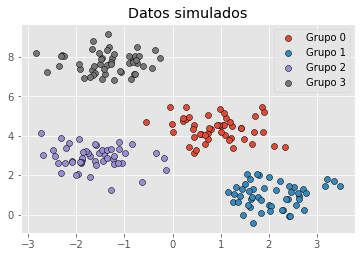

In [ ]:
#Generar la data
X, y = make_blobs(
        n_samples    = 200, 
        n_features   = 2, 
        centers      = 4, 
        cluster_std  = 0.60, 
        shuffle      = True, 
        random_state = 0
       )

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
for i in np.unique(y):
    ax.scatter(
        x = X[y == i, 0],
        y = X[y == i, 1], 
        c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
        marker    = 'o',
        edgecolor = 'black', 
        label= f"Grupo {i}"
    )
ax.set_title('Datos simulados')
ax.legend();

In [ ]:
X_scaled = scale(X)

In [ ]:
modelo_hclust_complete = AgglomerativeClustering(
                            affinity = 'euclidean',
                            linkage  = 'complete',
                            distance_threshold = 0,
                            n_clusters         = None
                        )
modelo_hclust_complete.fit(X=X_scaled)

modelo_hclust_average = AgglomerativeClustering(
                            affinity = 'euclidean',
                            linkage  = 'average',
                            distance_threshold = 0,
                            n_clusters         = None
                        )
modelo_hclust_average.fit(X=X_scaled)

modelo_hclust_ward = AgglomerativeClustering(
                            affinity = 'euclidean',
                            linkage  = 'ward',
                            distance_threshold = 0,
                            n_clusters         = None
                     )
modelo_hclust_ward.fit(X=X_scaled)

AgglomerativeClustering(distance_threshold=0, n_clusters=None)

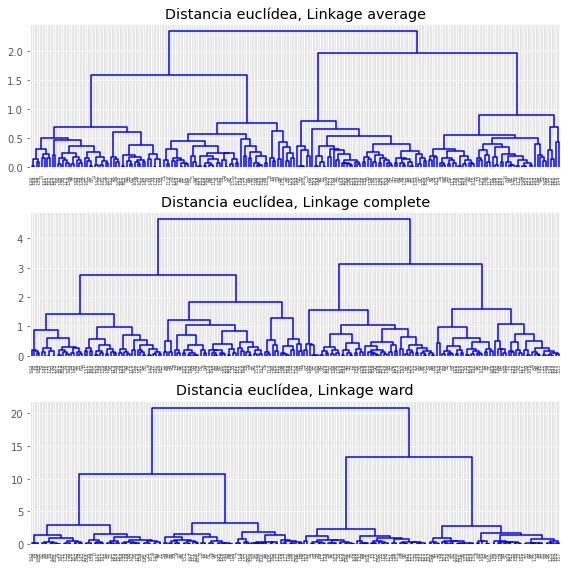

In [ ]:
# Dendrogramas
fig, axs = plt.subplots(3, 1, figsize=(8, 8))
plot_dendrogram(modelo_hclust_average, color_threshold=0, ax=axs[0])
axs[0].set_title("Distancia euclídea, Linkage average")
plot_dendrogram(modelo_hclust_complete, color_threshold=0, ax=axs[1])
axs[1].set_title("Distancia euclídea, Linkage complete")
plot_dendrogram(modelo_hclust_ward, color_threshold=0, ax=axs[2])
axs[2].set_title("Distancia euclídea, Linkage ward")
plt.tight_layout();

En este caso, los tres tipos de linkage identifican claramente 4 clusters, si bien esto no significa que en los 3 dendrogramas los clusters estén formados por exactamente las mismas observaciones.

Una forma de identificar el número de clusters, es inspeccionar visualmente el dendograma y decidir a qué altura se corta para generar los clusters. Por ejemplo, para los resultados generados mediante distancia euclídea y linkage ward, parece sensato cortar el dendograma a una altura de entre 5 y 10, de forma que se creen 4 clusters.

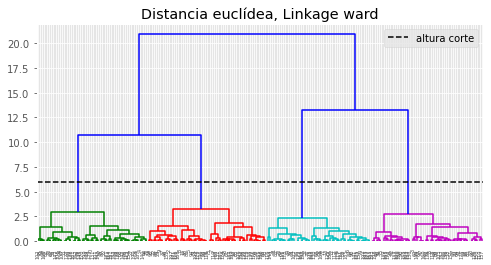

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
altura_corte = 6
plot_dendrogram(modelo_hclust_ward, color_threshold=altura_corte, ax=ax)
ax.set_title("Distancia euclídea, Linkage ward")
ax.axhline(y=altura_corte, c = 'black', linestyle='--', label='altura corte')
ax.legend();

Otra forma de identificar potenciales valores óptimos para el número de clusters en modelos hierarchical clustering es mediante los índices silhouette.

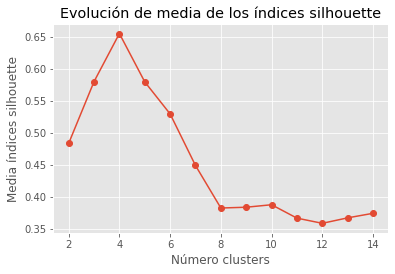

In [ ]:
# Método silhouette para identificar el número óptimo de clusters
range_n_clusters = range(2, 15)
valores_medios_silhouette = []

for n_clusters in range_n_clusters:
    modelo = AgglomerativeClustering(
                    affinity   = 'euclidean',
                    linkage    = 'ward',
                    n_clusters = n_clusters
             )

    cluster_labels = modelo.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)
    
fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')
ax.set_title("Evolución de media de los índices silhouette")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Media índices silhouette');

Una vez identificado el número óptimo de clusters, se reentrena el modelo indicando este valor.

In [ ]:
modelo_hclust_ward = AgglomerativeClustering(
                            affinity = 'euclidean',
                            linkage  = 'ward',
                            n_clusters = 4
                     )
modelo_hclust_ward.fit(X=X_scaled)

AgglomerativeClustering(n_clusters=4)

## <font color='green'>Actividad 1</font>

A continuación se entrega el código para generar una muestra de datos que nos sirvan para comparar los algoritmos de clusterización k-means, DBSCAN y jerárquico.

In [ ]:
import pandas as pd
import numpy as np
import math
# visualisations
import matplotlib.pyplot as plt
import seaborn as sns
# model building
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
from sklearn.neighbors import NearestNeighbors
# evaluation
from sklearn.metrics import silhouette_score

In [ ]:
np.random.seed(42)
def PointsInCircum(r,n=100):
    return [(math.cos(2*math.pi/n*x)*r+np.random.normal(-30,30),math.sin(2*math.pi/n*x)*r+np.random.normal(-30,30)) for x in range(1,n+1)]

In [ ]:
df=pd.DataFrame(PointsInCircum(500,1000))
df=df.append(PointsInCircum(300,700))
df=df.append(PointsInCircum(100,300))

# Adding noise to the dataset
df=df.append([(np.random.randint(-600,600),np.random.randint(-600,600)) for i in range(300)])

Text(0.5, 0, 'Característica 2')

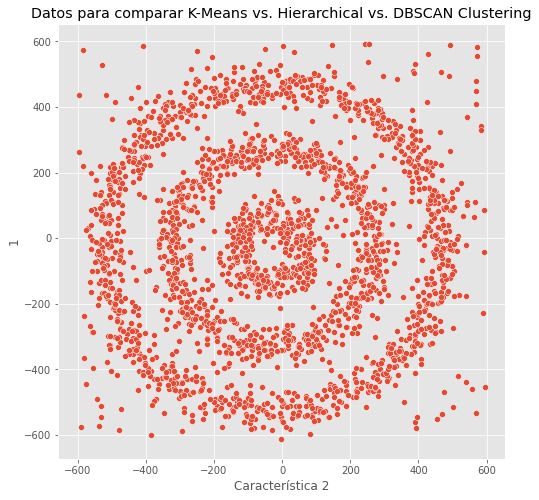

In [ ]:
plt.figure(figsize=(8,8))
sns.scatterplot(x=df[0],y=df[1])
plt.title('Datos para comparar K-Means vs. Hierarchical vs. DBSCAN Clustering')
plt.xlabel('Característica 1')
plt.xlabel('Característica 2')

Aplique k-means, DBSCAN y clustering jerárquico para el conjunto de datos anterior y compare sus resultados. Recuerde preprocesar su data (si corresponde) y utilizar los mejores acercamientos en cada uno de los métodos (por ejemplo kernel k-means u otros). Realice el tuning de los hiperparámetros en cada casop. Compare su resultados y comente.

In [ ]:
# Normalización de las variables
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(df)
print(X)

[[ 1.75338735 -0.02192723]
 [ 1.76880502  0.16015837]
 [ 1.67798868 -0.01021969]
 ...
 [ 0.55107967  1.8889869 ]
 [ 1.69893594 -1.75408113]
 [ 0.09879004  2.10207201]]


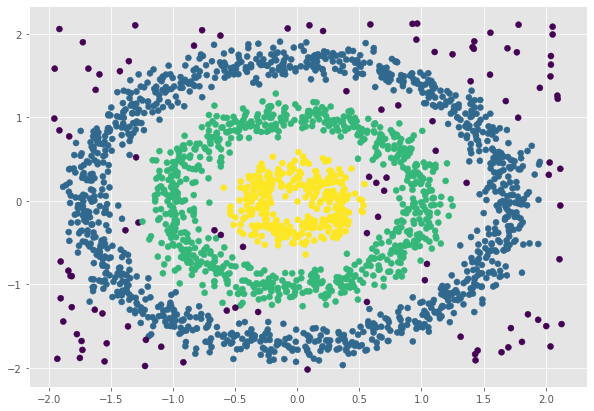

In [ ]:
# DBSCAN

# Entrenar DBSCAN
y_pred = DBSCAN(eps=0.15, min_samples=10).fit_predict(X)

# Graficar las predicciones
plt.figure(figsize=(10, 7))
plt.scatter(X[:,0], X[:,1], c=y_pred)

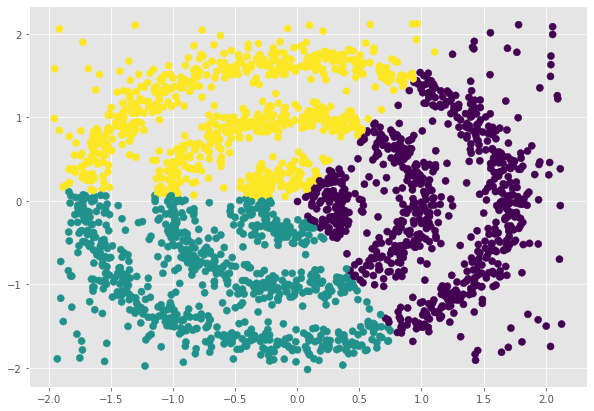

In [ ]:
# KMeans

# Entrenar KMeans
kmeans = KMeans(n_clusters=3,
                n_init=3,
                init='random',
                random_state=0).fit(X)

# Graficar Predicciones
labels = kmeans.predict(X)

plt.figure(figsize=(10, 7))
plt.scatter(X[:,0], X[:,1], c=labels,
            s=50, cmap='viridis');

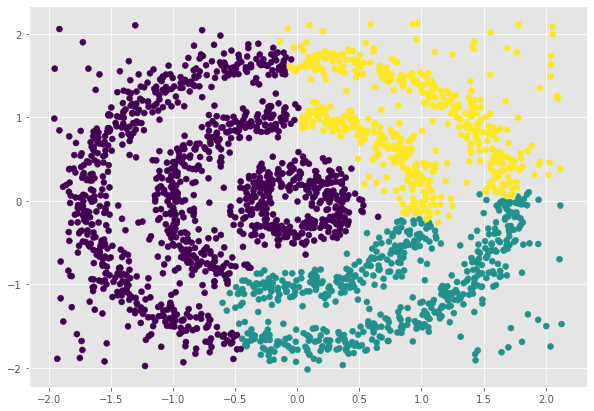

In [ ]:
# Jerarquico aglomerativo con distancia de ward

modelo_hclust_ward = AgglomerativeClustering(
                            affinity = 'euclidean',
                            linkage  = 'ward',
                            n_clusters         = 3
                     )
# Entrenamos el modelo
y_pred = modelo_hclust_ward.fit_predict(X=X)

# Predecimos y Graficamos

plt.figure(figsize=(10, 7))
plt.scatter(X[:,0], X[:,1], c=y_pred)

<font color='green'>Fin Actividad 1</font>
